### Comenzamos con la importación de las librerías necesarias para este proyecto.

In [593]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A continuación, vamos a leer el archivo .xlsx que estará acotado, es decir, se removieron hojas de este libro dado que no eran relevantes para el análisis. Además, había otras hojas que contenían la misma información.

In [594]:
df_internet = pd.ExcelFile('Data/Internet_acotado.xlsx')
sheet = df_internet.sheet_names 

### Las siguientes hojas son las que vamos a utilizar para el análisis.

In [595]:
sheet

['Velocidad % por prov',
 'Accesos Por Tecnología',
 'Penetracion-totales',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Accesos por velocidad',
 'Ingresos ']

----------

### Análisis de los datos de las hojas (sheets)

1. Valores nulos: Se identifican y analizan las celdas que contienen valores faltantes en cada una de las hojas del archivo.
2. Valores ceros: Se revisan los datos para detectar cualquier valor igual a cero que pueda influir en el análisis.
3. Valores duplicados: Se examinan las posibles duplicaciones de registros que puedan generar inconsistencias.
4. Outliers: Se buscan valores atípicos que puedan distorsionar los resultados y se evalúa su impacto en los datos.

### Comenzamos con la hoja Ingresos.

Esta hoja contiene los ingresos generados por los servicios de internet, expresados en miles de pesos.

In [596]:
# Cargamos la hoja del archivo en un Data Frame
df_ingresos = df_internet.parse('Ingresos ')
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2023,1,1.041350e+08,Ene-Mar 2023


In [597]:
# Viendo valores nulos
df_ingresos.isna().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [598]:
# Viendo valores ceros
(df_ingresos == 0).sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [599]:
# Viendo valores duplicados
df_ingresos.duplicated().sum()

np.int64(0)

#### Outliers

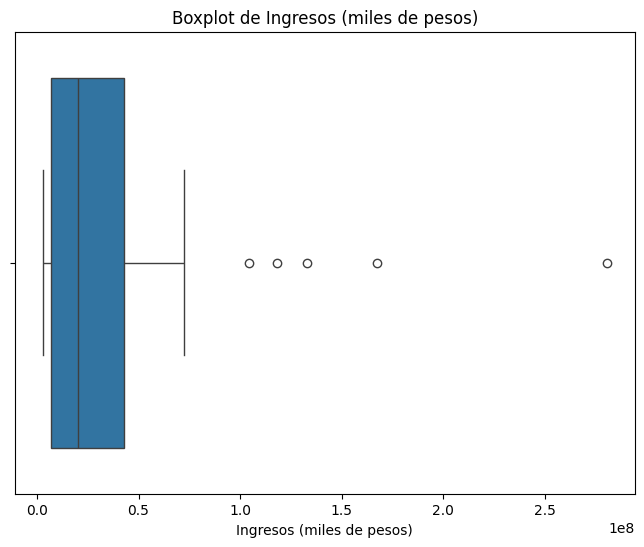

In [600]:
# Boxplot 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_ingresos['Ingresos (miles de pesos)'])
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.show()

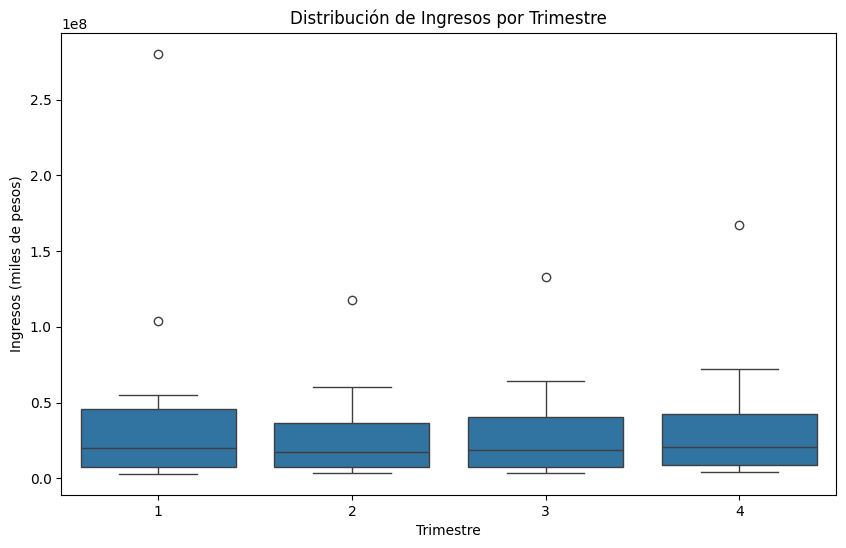

In [601]:
# Grafica separada por trimestre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trimestre', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Distribución de Ingresos por Trimestre')
plt.show()

#### El crecimiento de los ingresos ha sido muy rápido en los últimos años, lo que ha generado un sesgo hacia la derecha. Esto se refleja en los valores atípicos que aparecen fuera de los bigotes en el gráfico de Boxplot, indicando un aumento significativo en los ingresos en comparación con los años anteriores.

#### Por otro lado, no se encuentran valores nulos, ceros ni duplicados, por lo cual no será necesaria la imputación de datos.

----

## Análisis de la hoja de accesos por velocidad

Esta hoja contiene los accesos a internet desglosados por velocidad de conexión.

In [602]:
# Guardamos la hoja en un Data Frame
df_accesos_por_velocidad = df_internet.parse('Accesos por velocidad')
df_accesos_por_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


In [603]:
# Viendo valores nulos
df_accesos_por_velocidad.isna().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [604]:
# Viendo valores ceros
(df_ingresos == 0).sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [605]:
# Viendo valores duplicados
df_ingresos.duplicated().sum()

np.int64(0)

In [606]:
df_accesos_por_velocidad.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

### Buscaremos los outliers a partir de las conexiones de 6 Megas de velocidad.

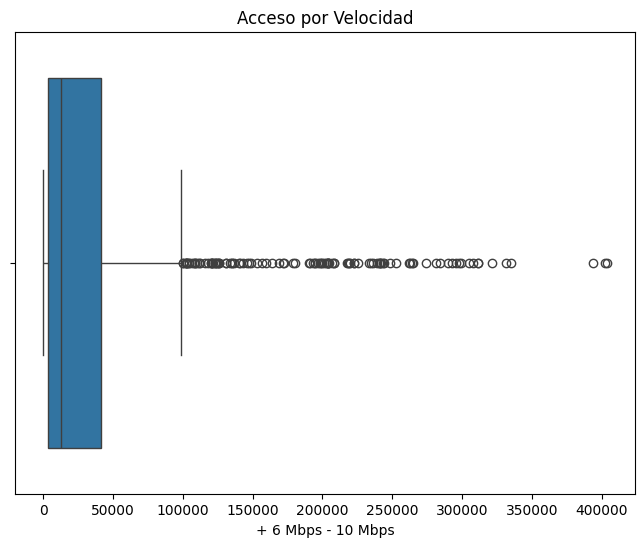

In [607]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 6 Mbps - 10 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

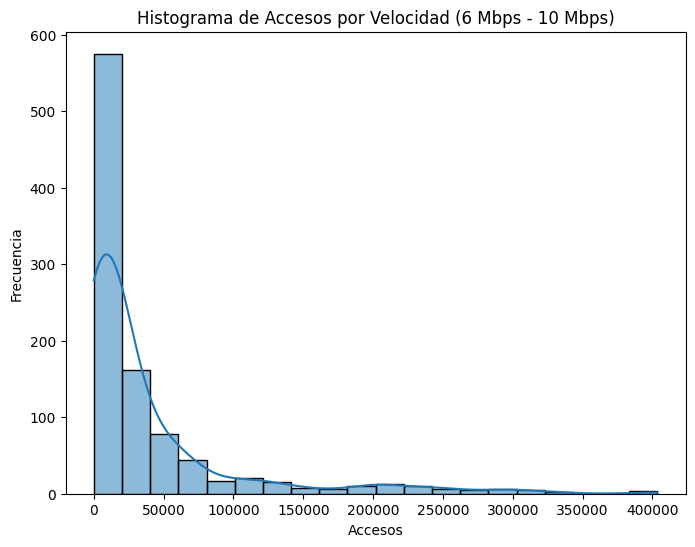

In [608]:
# Histograma de la columna '+ 6 Mbps - 10 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 6 Mbps - 10 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (6 Mbps - 10 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

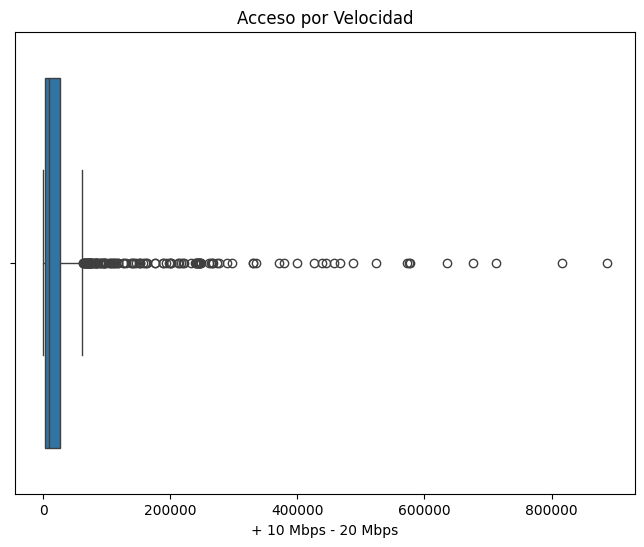

In [609]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 10 Mbps - 20 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

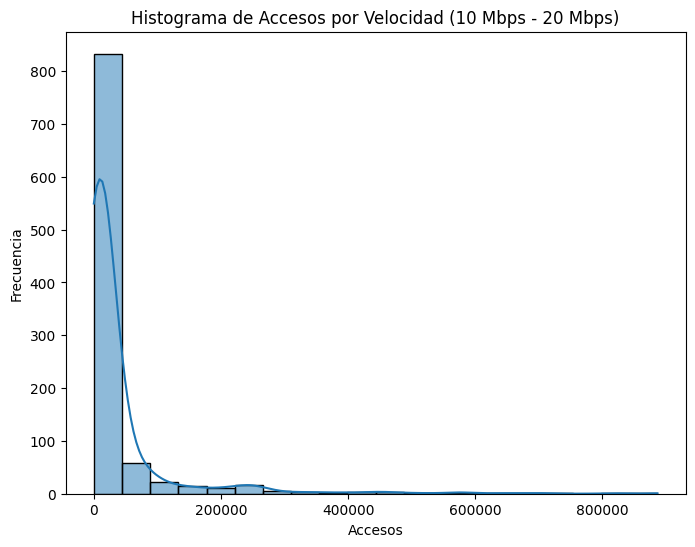

In [610]:
# Histograma de la columna '+ 10 Mbps - 20 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 10 Mbps - 20 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (10 Mbps - 20 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

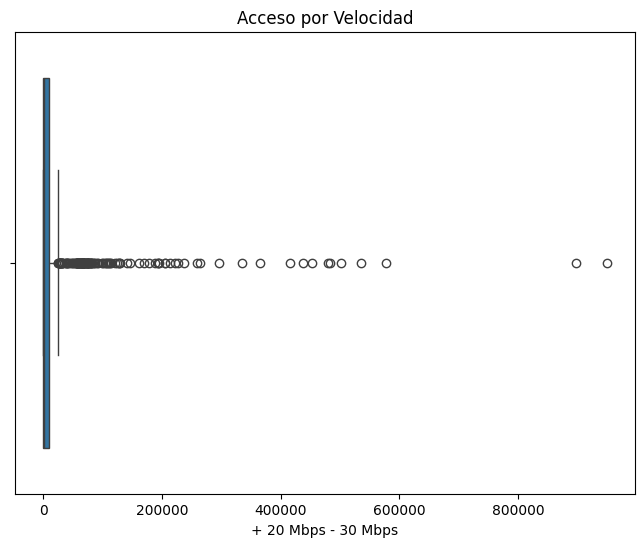

In [611]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 20 Mbps - 30 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

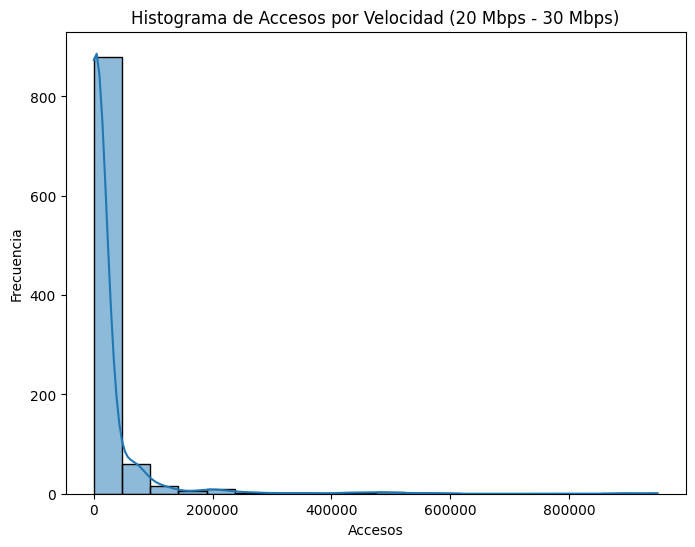

In [612]:
# Histograma de la columna '+ 20 Mbps - 30 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 20 Mbps - 30 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (20 Mbps - 30 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

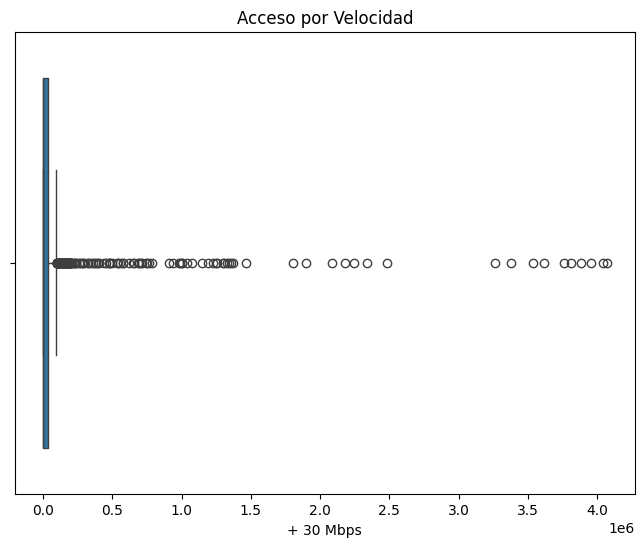

In [613]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 30 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

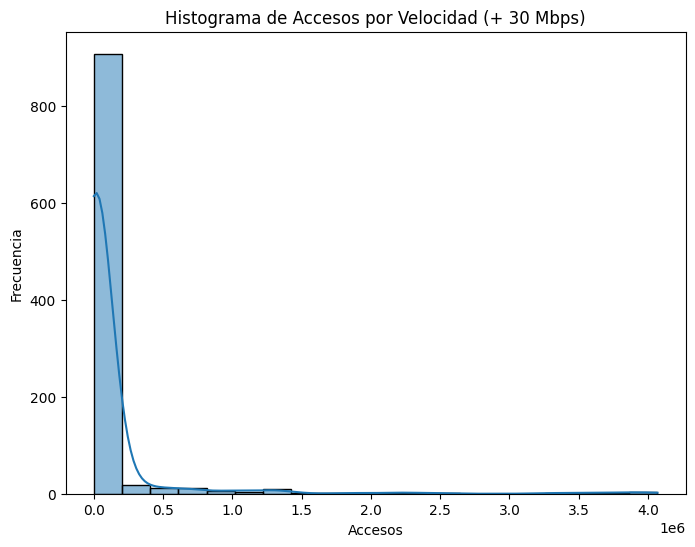

In [614]:
# Histograma de la columna '+ 30 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 30 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (+ 30 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

#### Acompañamos cada boxplot con un histograma. Observamos muchos valores atípicos, lo cual se debe a la distribución asimétrica presente en cada velocidad de conexión. Esto también está influenciado por los crecimientos irregulares que varían entre las provincias a lo largo del tiempo.

#### Distribución asimétrica positiva, sesgada hacia la derecha

#### Por otro lado, no se encuentran valores nulos, ceros ni duplicados, por lo cual no será necesaria la imputación de datos.

---

### Análisis de la hoja Penetración-hogares

Penetración de internet en hogares.
Entendiéndose "penetración" como el porcentaje de hogares o individuos que tienen acceso a internet en una determinada área geográfica. Se puede medir en términos de penetración en la población o en los hogares.

In [615]:
# Pasamos la hoja a un Data Frame
df_penetracion_hogares = df_internet.parse('Penetracion-hogares')
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [616]:
# Valores nulos
df_penetracion_hogares.isna().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [617]:
# Ceros 
(df_penetracion_hogares == 0).sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [618]:
# Valores duplicados
df_penetracion_hogares.duplicated().sum()

np.int64(0)

In [552]:
df_penetracion_hogares.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

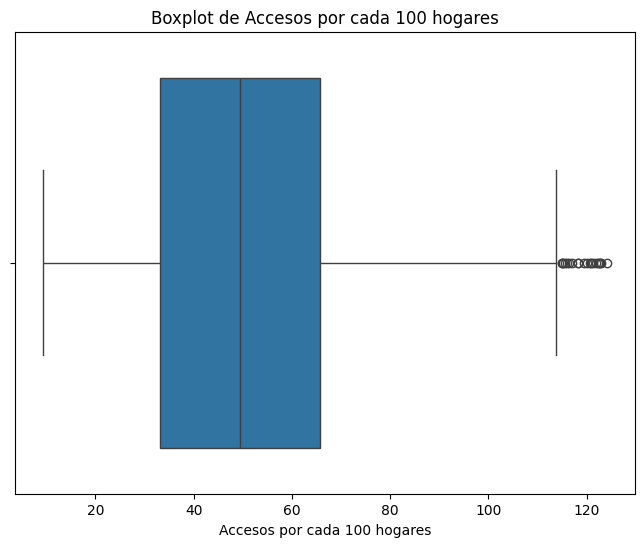

In [619]:
# Boxplot de la columna 'Accesos por cada 100 hogares'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_penetracion_hogares['Accesos por cada 100 hogares'])
plt.title('Boxplot de Accesos por cada 100 hogares')
plt.show()

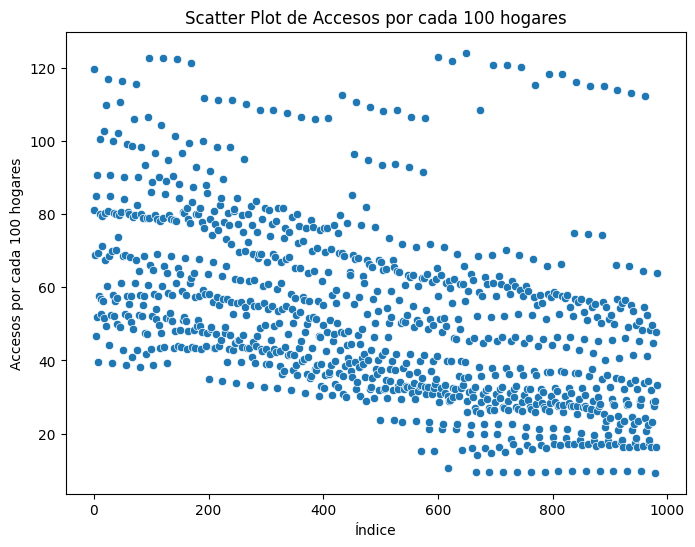

In [620]:
# Scatter Acceso por cada 100 hogares
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_penetracion_hogares.index, y=df_penetracion_hogares['Accesos por cada 100 hogares'])
plt.title('Scatter Plot de Accesos por cada 100 hogares')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()

#### Acompañamos este último gráfico también para observar el grado de dispersión de los accesos por cada 100 hogares.



#### Por otro lado, no se encuentran valores nulos, ceros ni duplicados, por lo cual no habrá imputación de datos.

---

### Análisis de la hoja Penetración-población

In [621]:
# Guardamos la hoja en un Data Frame
df_penetracion_poblacion = df_internet.parse('Penetración-poblacion')
df_penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [622]:
# Valores nulos
df_penetracion_poblacion.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [623]:
# Ceros
(df_penetracion_poblacion == 0).sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [624]:
# Valores duplicados
df_penetracion_poblacion.duplicated().sum()

np.int64(0)

In [625]:
df_penetracion_poblacion.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')

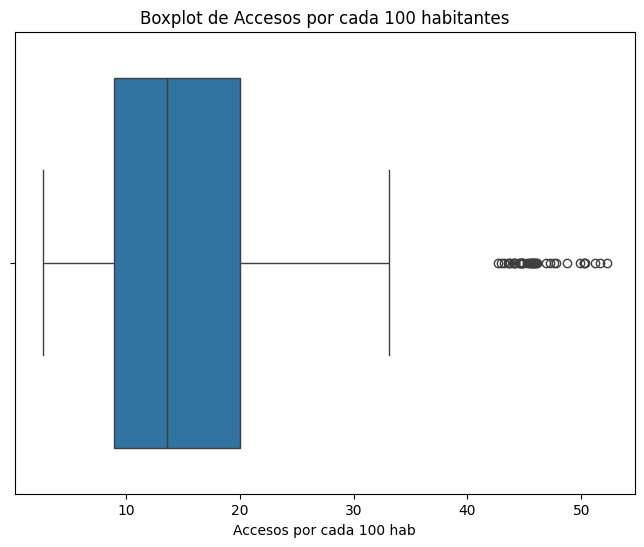

In [626]:
# Boxplot de la columna 'Accesos por cada 100 hab'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_penetracion_poblacion['Accesos por cada 100 hab'])
plt.title('Boxplot de Accesos por cada 100 habitantes')
plt.show()

---

### Análisis de la hoja Penetración-totales

In [627]:
# Pasamos la hoja a un DataFrame
df_penetracion_totales = df_internet.parse('Penetracion-totales')
df_penetracion_totales

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.890000,24.790000,Ene-Mar 2024
1,2023,4,78.560000,24.660000,Oct-Dic 2023
2,2023,3,77.840000,24.410000,Jul-Sept 2023
3,2023,2,77.020000,24.140000,Abr-Jun 2023
4,2023,1,77.200000,24.170000,Ene-Mar 2023
5,2022,4,77.210000,24.150000,Oct-Dic 2022
6,2022,3,76.640000,23.950000,Jul-Sept 2022
7,2022,2,75.965424,23.720442,Abr-Jun 2022
8,2022,1,73.878803,23.049171,Ene-Mar 2022
9,2021,4,73.176397,22.810702,Oct-Dic 2021


In [628]:
# Viendo valores nulos
df_penetracion_totales.isna().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [629]:
# Viendo ceros
(df_penetracion_totales == 0).sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [630]:
# Viendo duplicados
df_penetracion_totales.duplicated().sum()

np.int64(0)

In [631]:
df_penetracion_totales.columns

Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')

#### Gráficos para evaluar algunas relaciones.

1. Evolución de la penetración de accesos por cada 100 hogares y cada 100 habitantes a lo largo de los años.

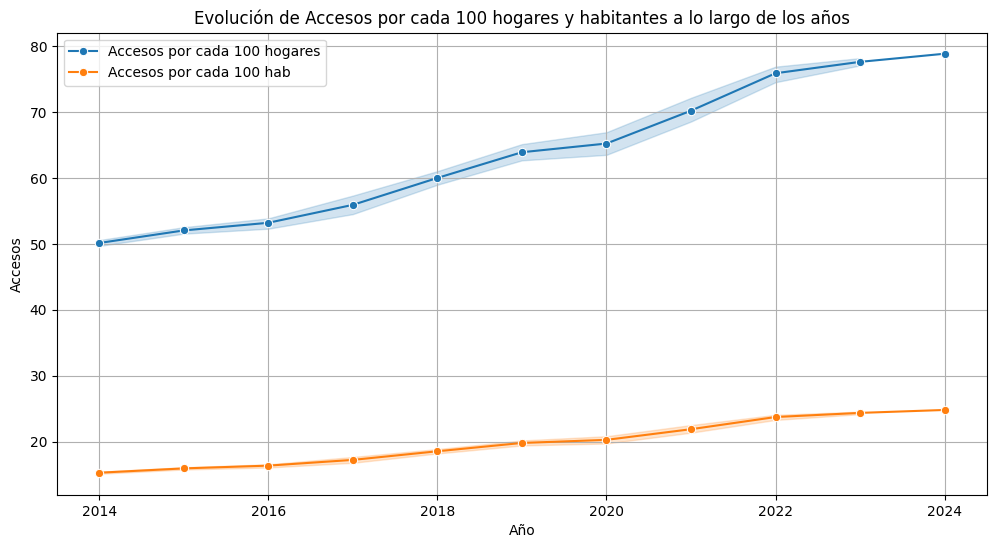

In [632]:
# Filtrar los datos por año
plt.figure(figsize=(12, 6))

# Gráfico de la evolución de los accesos por cada 100 hogares
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_penetracion_totales, marker='o', label='Accesos por cada 100 hogares')

# Gráfico de la evolución de los accesos por cada 100 habitantes
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=df_penetracion_totales, marker='o', label='Accesos por cada 100 hab')

# Etiquetas y subtitulos
plt.title('Evolución de Accesos por cada 100 hogares y habitantes a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.legend()
plt.grid(True)
plt.show()

2. Comparación de la penetración por trimestre. Gráfico de barras apiladas para visualizar cómo varía la penetración de acceso a internet por cada trimestre en un año determinado.

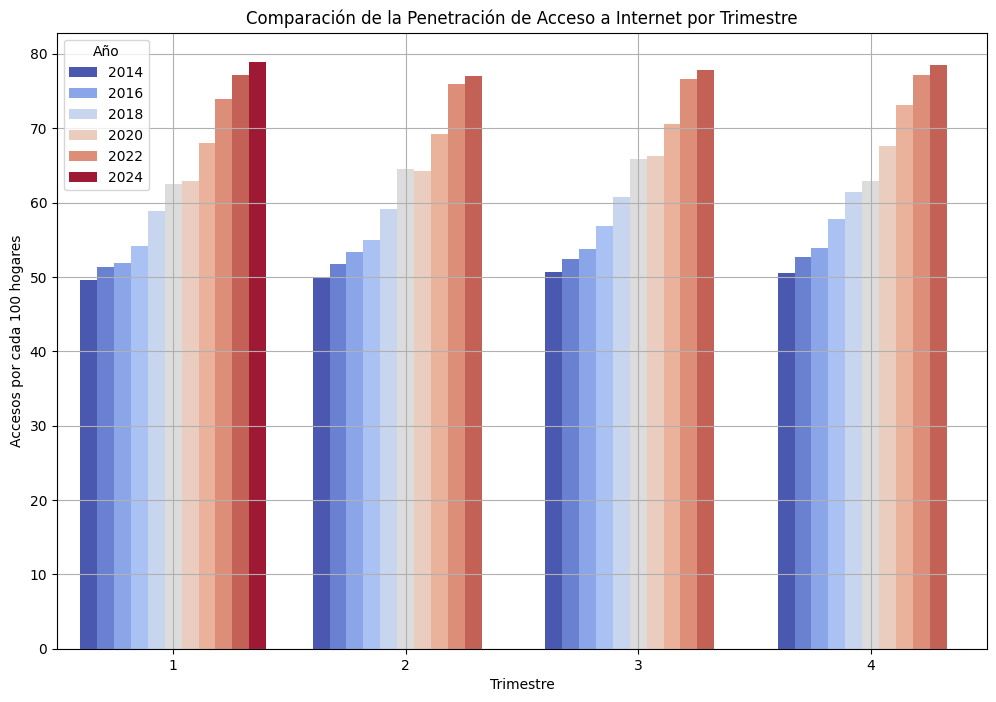

In [633]:
# Filtrar los datos por año y trimestre
plt.figure(figsize=(12, 8))
sns.barplot(x='Trimestre', y='Accesos por cada 100 hogares', data=df_penetracion_totales, hue='Año', palette='coolwarm')

# Etiquetas y subtitulos
plt.title('Comparación de la Penetración de Acceso a Internet por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Año')
plt.grid(True)
plt.show()

3. Comparación entre acceso por hogares y habitantes en un mismo gráfico para ver la relación entre los accesos por hogares y habitantes:

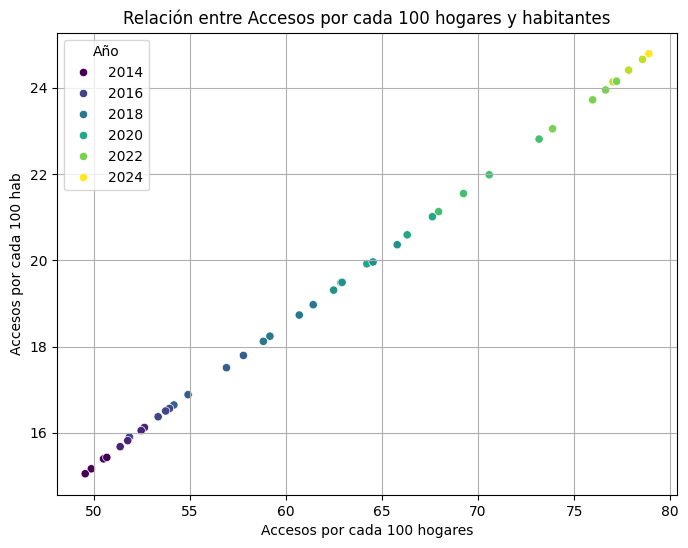

In [634]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Accesos por cada 100 hogares', y='Accesos por cada 100 hab', data=df_penetracion_totales, hue='Año', palette='viridis')

plt.title('Relación entre Accesos por cada 100 hogares y habitantes')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Accesos por cada 100 hab')
plt.grid(True)
plt.show()

#### Se puede ver en el gráfico de lineas como evolucionan los accesos cada 100 habitantes como así también los accesos cada 100 hogares, esto acompañado del gráfico de dispersión se puede decir que hay una relación lineal.
#### En el gráfico de barras podemos ver la penetración por trimestre en todos los años.

#### Por otro lado no se encuentran valores nulos, ceros ni duplicados, por lo cual no habrá imputación de datos.

---

### Análisis de la hoja Accesos Por Tecnología

In [635]:
# Pasamos la hoja a un Data Frame
df_accesos_por_tecnologia = df_internet.parse('Accesos Por Tecnología')
df_accesos_por_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024.0,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024.0,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024.0,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024.0,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024.0,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [636]:
# Valores nulos
df_accesos_por_tecnologia.isna().sum()

Año             2
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [637]:
# Valores ceros
(df_accesos_por_tecnologia == 0).sum()

Año              0
Trimestre        0
Provincia        0
ADSL             0
Cablemodem      14
Fibra óptica     9
Wireless        38
Otros            0
Total            0
dtype: int64

In [638]:
# Valores duplicados
df_accesos_por_tecnologia.duplicated().sum()

np.int64(0)

In [639]:
df_accesos_por_tecnologia.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

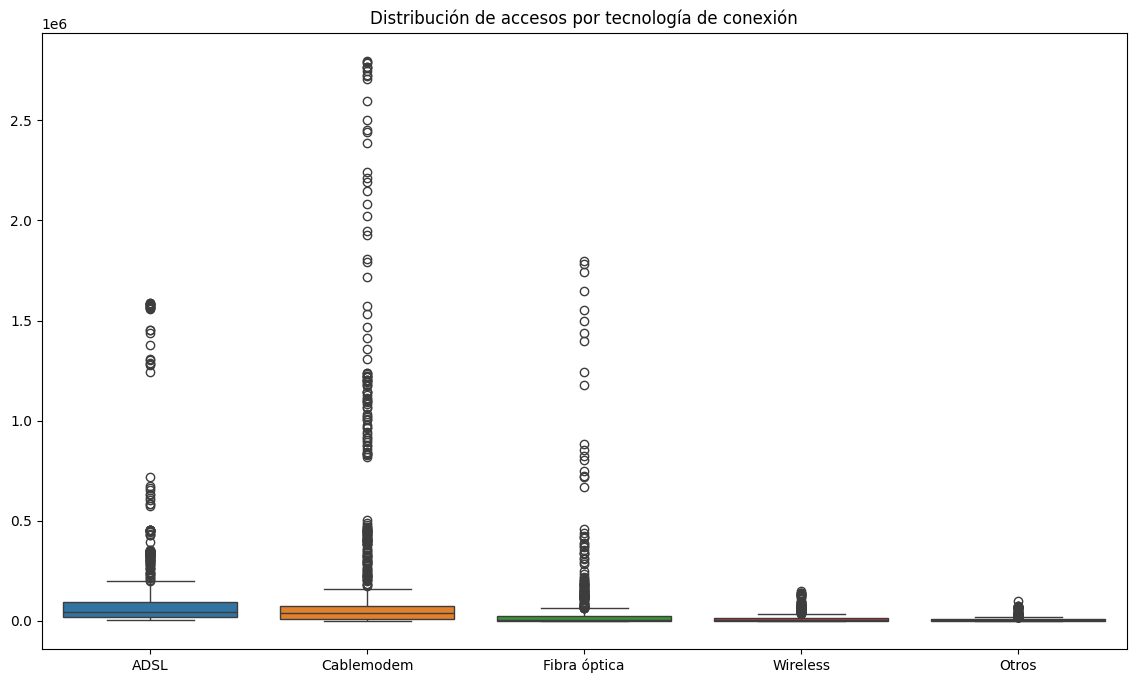

In [640]:
plt.figure(figsize=(14, 8))
# Boxplot para cada tecnología
sns.boxplot(data=df_accesos_por_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']])
# Titulo
plt.title('Distribución de accesos por tecnología de conexión')
plt.show()

#### Por otro lado no se encuentran valores nulos, ceros ni duplicados, por lo cual no habrá imputación de datos.

### Analisis de la hoja Velocidad % por prov

In [641]:
df_velocidad_por_provincia = df_internet.parse('Velocidad % por prov')
df_velocidad_por_provincia.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


In [642]:
# Valores nulos
df_velocidad_por_provincia.isna().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [643]:
# Valores ceros
(df_velocidad_por_provincia == 0).sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [644]:
# Valores duplicados
df_velocidad_por_provincia.duplicated().sum()

np.int64(0)

In [645]:
df_velocidad_por_provincia.columns

Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')

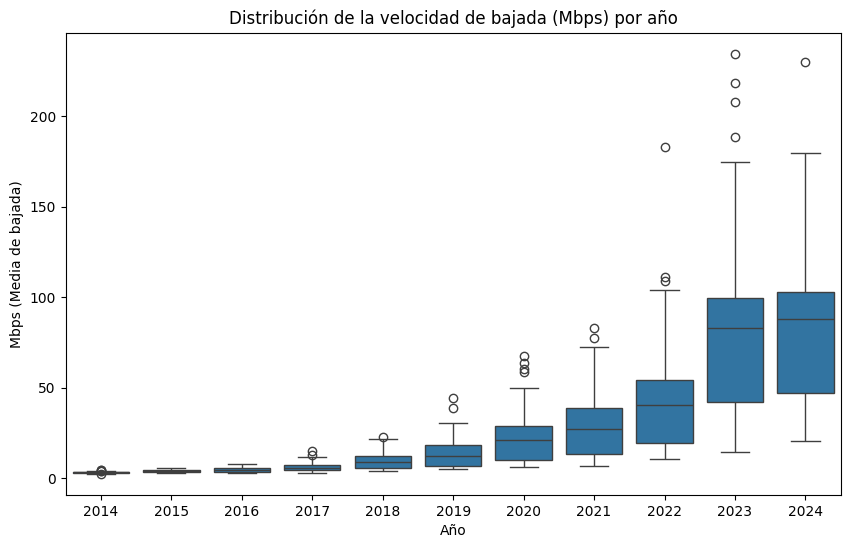

In [646]:
plt.figure(figsize=(10, 6))
# Boxplot de la velocidad de bajada (Mbps) por año
sns.boxplot(x='Año', y='Mbps (Media de bajada)', data=df_velocidad_por_provincia)
# Título
plt.title('Distribución de la velocidad de bajada (Mbps) por año')
plt.show()

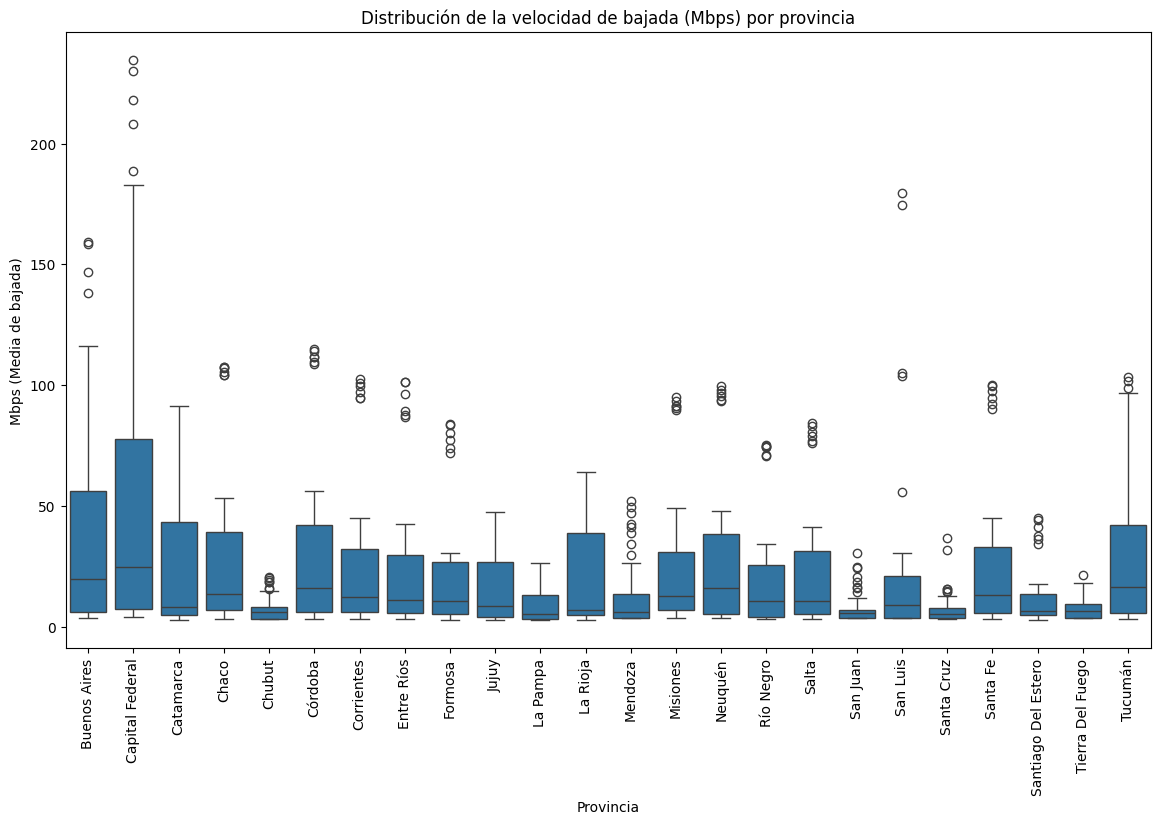

In [647]:
plt.figure(figsize=(14, 8))

# Boxplot de la velocidad de bajada (Mbps) por provincia
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=df_velocidad_por_provincia)
plt.xticks(rotation=90)

# Título
plt.title('Distribución de la velocidad de bajada (Mbps) por provincia')
plt.show()

#### Por otro lado no se encuentran valores nulos, ceros ni duplicados, por lo cual no habrá imputación de datos.

----

### Algunas gráficas y conclusiones

Vamos a ver en el primer gráfico como evolucionan los ingresos en pesos por los servicios de internet a través de los años.
Se puede notar como aumentan considerablemente a partir del 2020, todo impulsado por la pandemia.
Si bien ya venían en crecimiento, a partir de esa fecha es notable la suba de la curva.

### Gráfico de ingresos por años

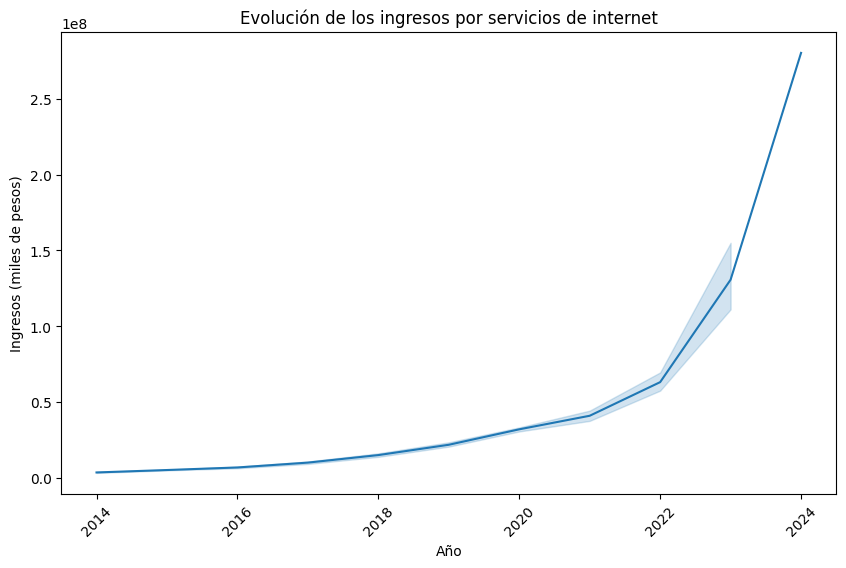

In [648]:
# Gráfico de la evolución de los ingresos
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Evolución de los ingresos por servicios de internet')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

### Gráfico de accesos por tecnología

In [649]:
df_accesos_por_tecnologia.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

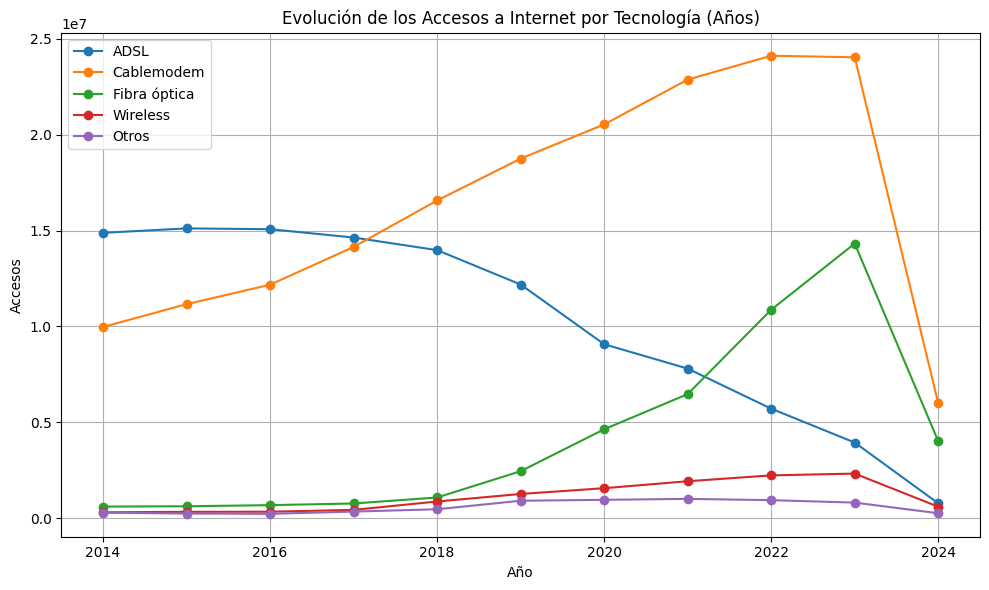

In [650]:
# Agrupar el dataframe por 'Año' y sumar los accesos para cada tecnología
df_agrupado = df_accesos_por_tecnologia.groupby('Año').sum()

# Graficar la evolución de las tecnologías
plt.figure(figsize=(10, 6))

plt.plot(df_agrupado.index, df_agrupado['ADSL'], label='ADSL', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Cablemodem'], label='Cablemodem', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Fibra óptica'], label='Fibra óptica', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Wireless'], label='Wireless', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Otros'], label='Otros', marker='o')

plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Evolución de los Accesos a Internet por Tecnología (Años)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Gráfico de líneas que muestra la evolución de los accesos a internet por diferentes tecnologías a lo largo de los años. Cada línea representa una tecnología de acceso a internet, como ADSL, Cablemodem, Fibra óptica, Wireless y otros tipos de acceso.

Aqui podemos ver algunas tendencias de crecimiento o decrecimiento de todas las tecnologias.

A simple vista y en concordancia con los avances tecnológicos y mejoras en las infraestructuras las tecnologías que crecen son Cable Modem y Fibra Óptica.

In [651]:
df_accesos_por_velocidad.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

### Evolución de las velocidades a través de los años

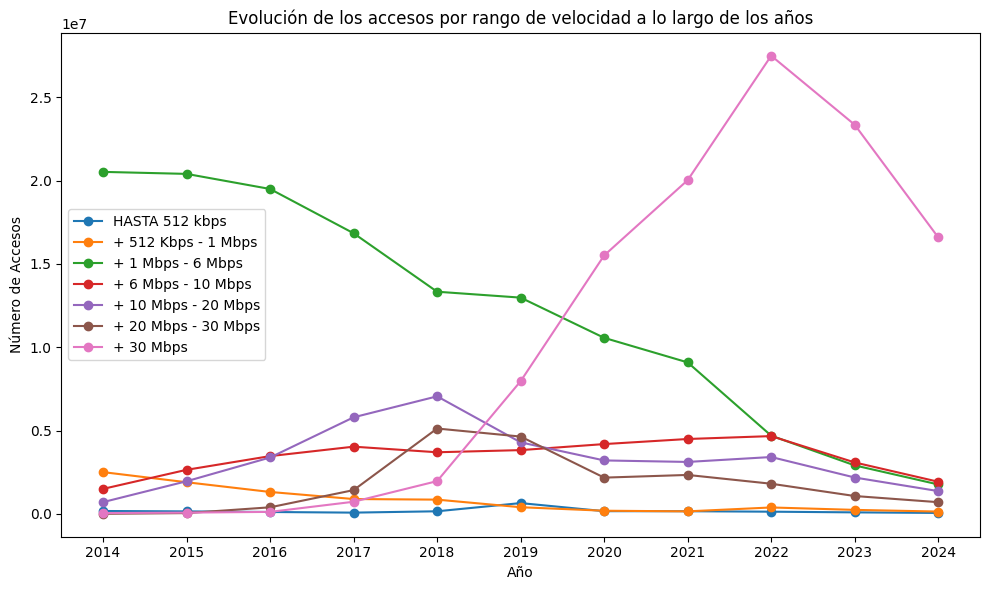

In [652]:
# Agrupar el dataframe por 'Año' y sumar los accesos para cada rango de velocidad
df_agrupado = df_accesos_por_velocidad.groupby('Año').sum()

plt.figure(figsize=(10, 6))

# Graficar la evolución de los accesos para cada rango de velocidad
plt.plot(df_agrupado.index, df_agrupado['HASTA 512 kbps'], label='HASTA 512 kbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 512 Kbps - 1 Mbps'], label='+ 512 Kbps - 1 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 1 Mbps - 6 Mbps'], label='+ 1 Mbps - 6 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 6 Mbps - 10 Mbps'], label='+ 6 Mbps - 10 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 10 Mbps - 20 Mbps'], label='+ 10 Mbps - 20 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 20 Mbps - 30 Mbps'], label='+ 20 Mbps - 30 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 30 Mbps'], label='+ 30 Mbps', marker='o')

# Etiquetas y titulos
plt.title('Evolución de los accesos por rango de velocidad a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.xticks(df_agrupado.index)  # Asegurarse de que los años estén como ticks en el eje x

# Legendas --
plt.legend()

plt.tight_layout()
plt.show()

Este gráfico de líneas muestra la evolución de los accesos a internet por diferentes rangos de velocidad a lo largo de los años. Cada línea representa un rango de velocidad distinto, desde conexiones muy lentas hasta las más rápidas (más de 30 Mbps). El gráfico ofrece una visión clara del comportamiento de los usuarios de internet respecto a la adopción de diferentes velocidades con el paso del tiempo.

Se observan tendencias de adoptar cada vez velocidades mas elevadas, entre 20 Mbps, y mas de 30 Mbps.

## KPI 1

1. KPI 1: Crecimiento de los accesos a velocidad +30 Mbps

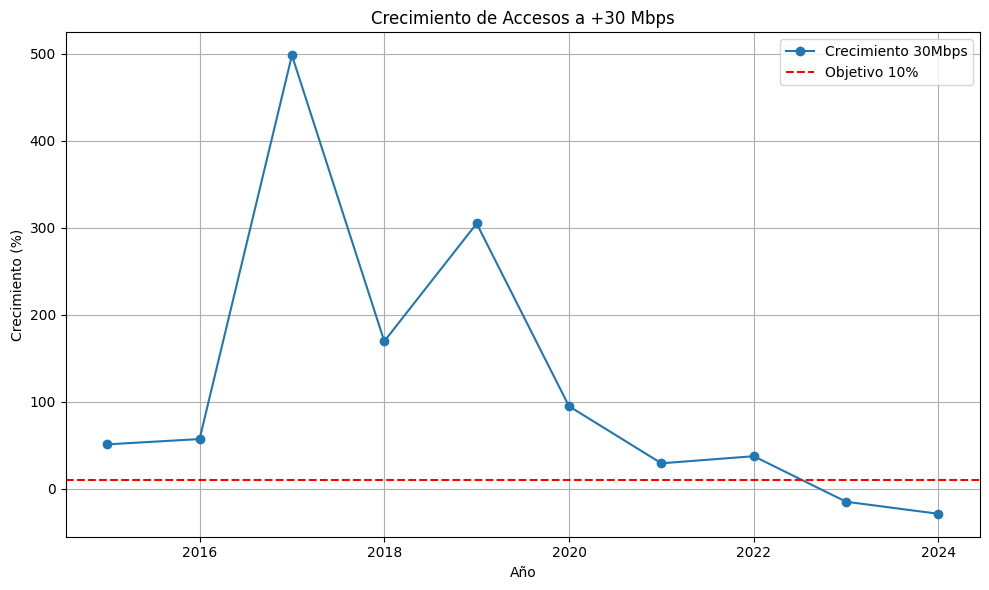

In [653]:
# Agrupar los datos por año
df_agrupado = df_accesos_por_velocidad.groupby('Año').sum()

# Calcular KPI Crecimiento 30 Mbps
df_agrupado['Crecimiento_30Mbps'] = (df_agrupado['+ 30 Mbps'] - df_agrupado['+ 30 Mbps'].shift(1)) / df_agrupado['+ 30 Mbps'].shift(1) * 100

# Visualización del KPI
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado.index, df_agrupado['Crecimiento_30Mbps'], marker='o', label='Crecimiento 30Mbps')
plt.axhline(y=10, color='r', linestyle='--', label='Objetivo 10%')
plt.title('Crecimiento de Accesos a +30 Mbps')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2. KPI 2: Penetración de internet por hogar
Objetivo: Aumentar la penetración del acceso a internet en un 2% respecto al trimestre anterior, por provincia.

In [654]:
df_accesos_por_tecnologia.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

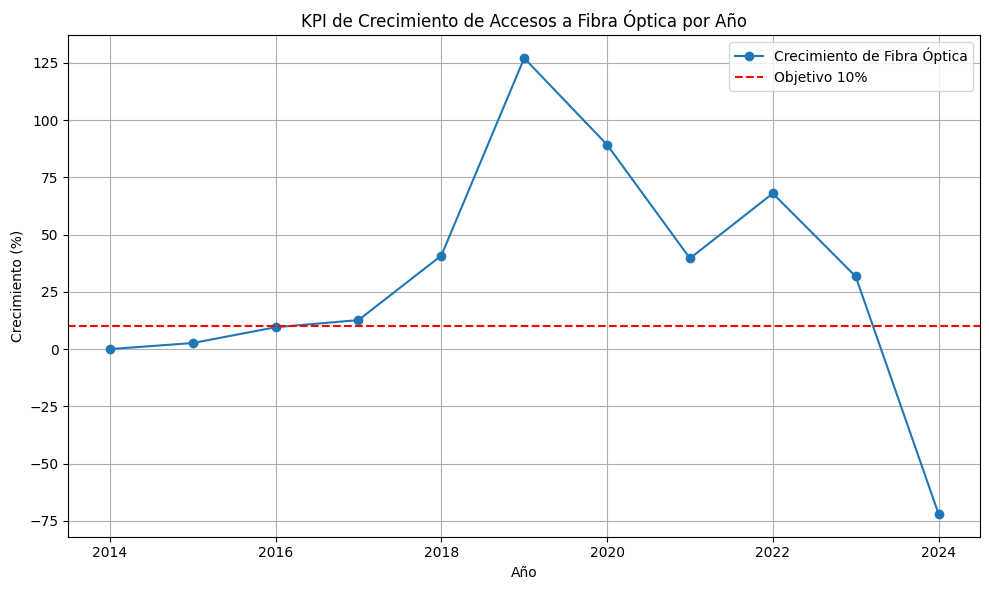

In [655]:
# Agrupar los datos por 'Año' y sumar los accesos para cada año
df_fibra_agrupado = df_accesos_por_tecnologia.groupby('Año')['Fibra óptica'].sum().reset_index()

# Calcular el crecimiento porcentual año a año
df_fibra_agrupado['KPI_Crecimiento_Fibra'] = df_fibra_agrupado['Fibra óptica'].pct_change() * 100

# Rellenar los valores NaN con 0
df_fibra_agrupado['KPI_Crecimiento_Fibra'] = df_fibra_agrupado['KPI_Crecimiento_Fibra'].fillna(0)

# Visualización del KPI de Crecimiento para Fibra Óptica
plt.figure(figsize=(10, 6))
plt.plot(df_fibra_agrupado['Año'], df_fibra_agrupado['KPI_Crecimiento_Fibra'], marker='o', label='Crecimiento de Fibra Óptica')
plt.axhline(y=10, color='r', linestyle='--', label='Objetivo 10%')
plt.title('KPI de Crecimiento de Accesos a Fibra Óptica por Año')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3. KPI 3: Incremento total de accesos a internet
Objetivo: Medir el incremento total de accesos a internet respecto al año anterior.

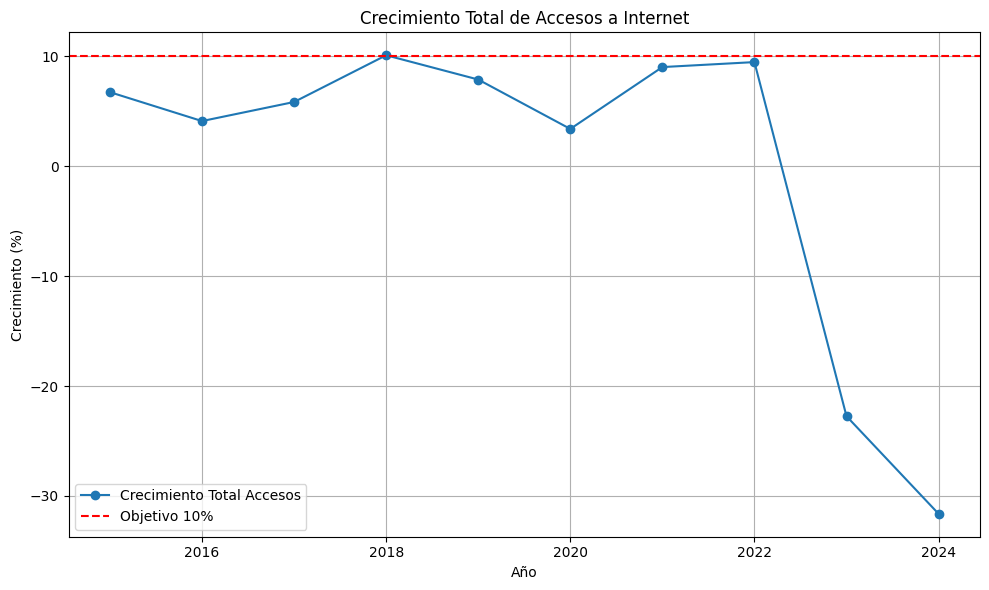

In [656]:
# Calcular KPI Incremento Total de Accesos
df_agrupado['Crecimiento_Total_Accesos'] = (df_agrupado['Total'] - df_agrupado['Total'].shift(1)) / df_agrupado['Total'].shift(1) * 100

# Visualización del KPI
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado.index, df_agrupado['Crecimiento_Total_Accesos'], marker='o', label='Crecimiento Total Accesos')
plt.axhline(y=10, color='r', linestyle='--', label='Objetivo 10%')
plt.title('Crecimiento Total de Accesos a Internet')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
